# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Muhammad Fawaid As'ad
- **Email:** muhammadfawaidasad@gmail.com
- **ID Dicoding:** fawaid27

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda paling banyak?
- Cuaca apa yang paling banyak penyewaan sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

## Data Wrangling

### Gathering Data

In [9]:
day=pd.read_csv("day.csv")
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [10]:
hour=pd.read_csv("hour.csv")
hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- data bertipe integer

### Assessing Data

In [13]:
#mencari missing value
day.isnull().sum()
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
#mencari duplicate data
day.duplicated().sum()
hour.duplicated().sum()

0

**Insight:**
- data yang disediakan tidak ada data yang missing value
- data yang disediakan tidak ada data yang duplicate

### Cleaning Data

In [17]:
#Mengganti format data
day["dteday"]=pd.to_datetime(day["dteday"])
hour["dteday"]=pd.to_datetime(hour["dteday"])

In [18]:
#menghapus baris atau kolom yang memiliki missing value
day.dropna(axis=0, inplace=True)
hour.dropna(axis=0, inplace=True)

In [19]:
#menghapus data yang mengalami duplicate
day.drop_duplicates(inplace=True)
hour.drop_duplicates(inplace=True)

In [20]:
drop_columns = ['season', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
day.drop(columns=drop_columns, inplace=True)
hour.drop(columns=drop_columns, inplace=True)

**Insight:**
- Berdasarkan assesing data tidak ada missing value dan duplicate data maka pada proses cleaning data tidak ada perubahan data
- Menghapus kolom untuk mempermudah dalam analisis data

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
day.describe()

,instant,dteday,yr,mnth,weekday,weathersit,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,2.997264,1.395349,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,1.000000,1.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,3.000000,1.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,5.000000,2.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,6.000000,3.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,2.004787,0.544894,1937.211452


In [25]:
hour.describe()

,instant,dteday,yr,mnth,hr,weekday,weathersit,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,3.003683,1.425283,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,1.000000,1.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,3.000000,1.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,5.000000,2.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,6.000000,4.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,2.005771,0.639357,181.387599


In [26]:
day.corr()

,instant,dteday,yr,mnth,weekday,weathersit,cnt
instant,1.000000,1.000000,0.866025,0.496702,-0.000016,-0.021477,0.628830
dteday,1.000000,1.000000,0.866025,0.496702,-0.000016,-0.021477,0.628830
yr,0.866025,0.866025,1.000000,-0.001792,-0.005461,-0.048727,0.566710
mnth,0.496702,0.496702,-0.001792,1.000000,0.009509,0.043528,0.279977
weekday,-0.000016,-0.000016,-0.005461,0.009509,1.000000,0.031087,0.067443
weathersit,-0.021477,-0.021477,-0.048727,0.043528,0.031087,1.000000,-0.297391
cnt,0.628830,0.628830,0.566710,0.279977,0.067443,-0.297391,1.000000


In [27]:
hour.corr()

,instant,dteday,yr,mnth,hr,weekday,weathersit,cnt
instant,1.000000,0.999995,0.866014,0.489164,-0.004775,0.001357,-0.014198,0.278379
dteday,0.999995,1.000000,0.865648,0.489808,-0.006161,0.001372,-0.014063,0.277753
yr,0.866014,0.865648,1.000000,-0.010473,-0.003867,-0.004485,-0.019157,0.250495
mnth,0.489164,0.489808,-0.010473,1.000000,-0.005772,0.010400,0.005400,0.120638
hr,-0.004775,-0.006161,-0.003867,-0.005772,1.000000,-0.003498,-0.020203,0.394071
weekday,0.001357,0.001372,-0.004485,0.010400,-0.003498,1.000000,0.003311,0.026900
weathersit,-0.014198,-0.014063,-0.019157,0.005400,-0.020203,0.003311,1.000000,-0.142426
cnt,0.278379,0.277753,0.250495,0.120638,0.394071,0.026900,-0.142426,1.000000


insight = berdasarkan nilai korelasi tersebut, beberapa kolom tersebut tidak memiliki korelasi karena nilainya mendekati 0

In [29]:
hour.groupby(by="weathersit").agg({
    "hr":"nunique",
    "cnt":["max", "min", "mean","std"]
})

hr  cnt                            
           nunique  max min        mean         std
weathersit                                         
1               24  977   1  204.869272  189.487773
2               24  957   1  175.165493  165.431589
3               24  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

In [30]:
day.groupby(by="weathersit").agg({
    "mnth":"nunique",
    "cnt":["max", "min", "mean","std"]
})

mnth   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1               12  8714  431  4876.786177  1879.483989
2               12  8362  605  4035.862348  1809.109918
3                9  4639   22  1803.285714  1240.284449

In [31]:
#membagi waktu pertahun dari data per jam
hour['year'] = pd.to_datetime(hour['dteday']).dt.year

# Total rental per jam dan pertahun
year_hour_rentals = hour.groupby(['year', 'hr'])['cnt'].sum().reset_index()

In [32]:
#jumlah penyewa berdasarkan jam penyewaan

hour.groupby(by="hr").agg({
    "weathersit":"nunique",
    "cnt":"sum"
})

,weathersit,cnt
hr,,
0,3,39130
1,4,24164
2,3,16352
3,3,8174
4,3,4428
5,3,14261
6,3,55132
7,3,154171
8,3,261001


**Insight:**
- Jumlah jam penyewaan rata-rata ditiga cuaca
- jumlah penyewaan terbanyak terdapat pada jam 17

## Visualization & Explanatory Analysis

### Pertanyaan 1:

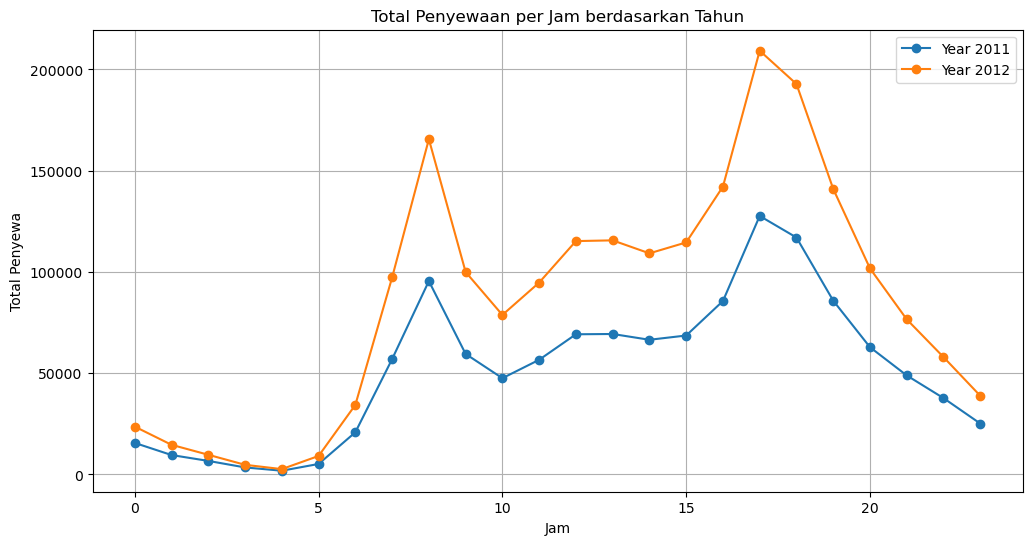

In [36]:
# Total Penyewaan per Jam berdasarkan Tahun
pivot_table = year_hour_rentals.pivot(index='hr', columns='year', values='cnt')
plt.figure(figsize=(12, 6))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], marker='o', label=f'Year {year}')
plt.title('Total Penyewaan per Jam berdasarkan Tahun')
plt.xlabel('Jam')
plt.ylabel('Total Penyewa')
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:

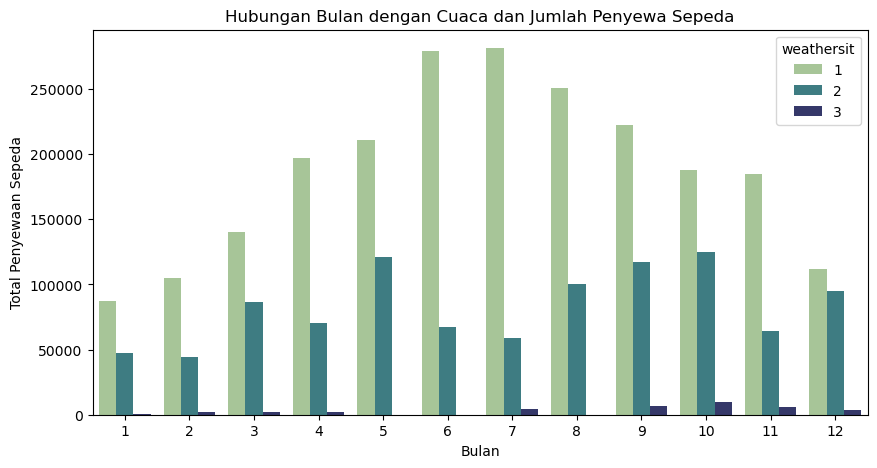

In [80]:
# Hubungan Bulan dengan Cuaca berdasarkan Jumlah Penyewa Sepeda
weath_month = day.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()
plt.subplots(figsize=(10, 5))
sns.barplot(x=weath_month["mnth"], y=weath_month["cnt"], hue=weath_month["weathersit"], data=day, palette="crest")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Hubungan Bulan dengan Cuaca dan Jumlah Penyewa Sepeda")
plt.show(fig)

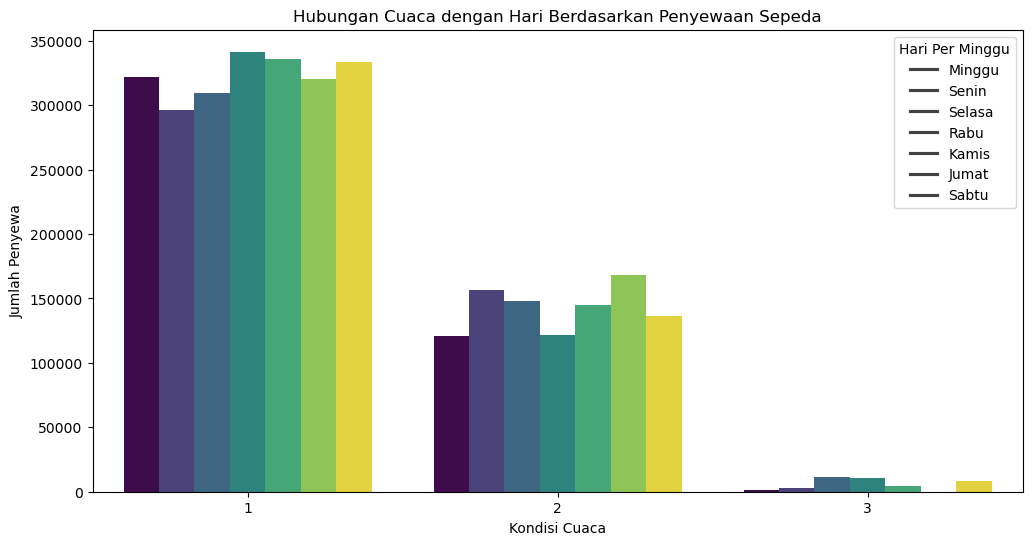

In [86]:
# Hubungan Cuaca dengan Hari berdasarkan Penyewaan Sepeda
weath_day = day.groupby(['weekday', 'weathersit'])['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=weath_day['weathersit'], y=weath_day['cnt'], hue=weath_day['weekday'], data=day, palette='viridis')
plt.title('Hubungan Cuaca dengan Hari Berdasarkan Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa')
plt.legend(title='Hari Per Minggu', labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show(fig)

**Insight:**
- Mengalami kenaikan jumlah penyewa dari tahun 2011 ke tahun 2012
- 

## Analisis Lanjutan (Opsional)

## Conclusion

- Pada tahun 2011 dan 2012 jumlah penyewa terbanyak ketika pukul 17.00
- Pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy penyewaan paling banyak dari tahun 2011 hingga 2012
- sehingga pada cuaca lain agar meningkatkan volume penyewaan bisa menggunakan strategi marketing yang sesuai dengan kondisi bisa menggunakan promo atau dengan diskon